# Mobile App for Lottery Addiction

# Introduction
In this guided project we put everything together to contribute to the development of a mobile app that is meant to help lottery addicts better estimate their chances of winning.

Many people start playing the lottery for fun, but for some this activity turns into a habit which eventually escalates into addiction. Like other compulsive gamblers, lottery addicts soon begin spending from their savings and loans, they start to accumulate debts, and eventually engage in desperate behaviors like theft.

A medical institute that aims to prevent and treat gambling addictions wants to build a dedicated mobile app to help lottery addicts better estimate their chances of winning. The institute has a team of engineers that will build the app, but they need us to create the logical core of the app and calculate probabilities.

For the first version of the app, they want us to focus on the 6/49 lottery and build functions that enable users to answer questions like:

- What is the probability of winning the big prize with a single ticket?
- What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
- What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

The institute also wants us to consider historical data coming from the national 6/49 lottery game in Canada. The data set https://www.kaggle.com/datascienceai/lottery-dataset has data for 3,665 drawings, dating from 1982 to 2018 (we'll come back to this).

The scenario we're following throughout this project is fictional — the main purpose is to practice applying the concepts we learned in a setting that simulates a real-world scenario.

# Core Functions
Our goal is to write code that can enable users to answer probability questions about playing the lottery. Throughout the project, we'll need to calculate repeatedly probabilities and combinations. As a consequence, we'll start by writing two functions that we'll use often:

- A function that calculates factorials; and
- A function that calculates combinations.

To calculate factorials, this is the formula we learned we need to use:

\begin{equation}
n! = n \times (n - 1) \times (n - 2) \times ... \times 2 \times 1
\end{equation}

In the 6/49 lottery, six numbers are drawn from a set of 49 numbers that range from 1 to 49. The drawing is done without replacement, which means once a number is drawn, it's not put back in the set.

To find the number of combinations when we're sampling without replacement and taking only k objects from a group of n objects, we can use the formula:

\begin{equation}
_nC_k = {n \choose k} =  \frac{n!}{k!(n-k)!}
\end{equation}

## Tasks
1. Write a function named `factorial()` which takes as input a number `n` and computes the factorial of that number `n`. Remember that we already coded this function in the last mission.
2. Write a function named `combinations()` which takes in two inputs (`n` and `k`) and outputs the number of combinations when we're taking only `k` objects from a group of `n` objects. Remember that we already coded this function in the last mission.

In [18]:
# Factorial Function:
def factorial(n):
    if n == 1:
        return n
    else:
        return n*factorial(n-1)
    
test_factor = factorial(5)
test_factor

120

In [19]:
def combinations(n,k):
    oben = factorial(n)
    unten = factorial(k)*factorial(n-k)
    return oben/unten

test_combi = combinations(10,4)
test_combi

210.0

# One Ticket Probability
Now we focus on writing a function that calculates the probability of winning the big prize.

In the 6/49 lottery, six numbers are drawn from a set of 49 numbers that range from 1 to 49. A player wins the big prize if the six numbers on their tickets match all the six numbers drawn. If a player has a ticket with the numbers {13, 22, 24, 27, 42, 44}, he only wins the big prize if the numbers drawn are {13, 22, 24, 27, 42, 44}. If only one number differs, he doesn't win.

For the first version of the app, we want players to be able to calculate the probability of winning the big prize with the various numbers they play on a single ticket (for each ticket a player chooses six numbers out of 49). So, we'll start by building a function that calculates the probability of winning the big prize for any given ticket.

We discussed with the engineering team of the medical institute, and they told us we need to be aware of the following details when we write the function:

- Inside the app, the user inputs six different numbers from 1 to 49.
- Under the hood, the six numbers will come as a Python list, which will serve as the single input to our function.
- The engineering team wants the function to print the probability value in a friendly way — in a way that people without any probability training are able to understand.

## Tasks
1. Write a function named `one_ticket_probability()`, which takes in a list of six unique numbers and prints the probability of winning in a way that's easy to understand.
 - Start by calculating the total number of possible outcomes — this is total number of combinations for a six-number lottery ticket. There are 49 possible numbers, and six numbers are sampled without replacement. Use the `combinations()` function you wrote in the previous screen.
 - The user inputs just one combination, which means the number of successful outcomes is 1.
 - Use the number of successful outcomes and the total number of possible outcomes to calculate the probability for one ticket.
 - The function should print the probability in a way that's easy to understand. It's up to you what you choose, but here are a few suggestions:
     - Print the probability as a percentage.
     - Use the str.format() method to make the printed message more personalized with respect to what the user inputs.
2. Test your function using a few inputs.
3. Add some context for your readers to explain what you did in this step and why.

In [20]:
def one_ticket_probability(lucky_nums):
    outcomes = combinations(49,len(lucky_nums))
    prob = (1/outcomes)*100
    print('''Your chances to win the big prize with the numbers {} are {:.7f}%.
In other words, you have a 1 in {:,} chances to win.'''.format(lucky_nums,
                    prob, int(outcomes)))
        
lucky_numbers = [1,2,3,4,5,6]
test_one = one_ticket_probability(lucky_numbers)
test_one

Your chances to win the big prize with the numbers [1, 2, 3, 4, 5, 6] are 0.0000072%.
In other words, you have a 1 in 13,983,816 chances to win.


# Historical Data Check for Canada Lottery
On the previous screen, we wrote a function that can tell users what is the probability of winning the big prize with a single ticket. For the first version of the app, however, users should also be able to compare their ticket against the historical lottery data in Canada and determine whether they would have ever won by now.

On this screen, we'll focus on exploring the historical data coming from the Canada 6/49 lottery. The data set can be downloaded from Kaggle and it has the following structure:

|PRODUCT|DRAW NUMBER|SEQUENCE NUMBER|DRAW DATE|NUMBER DRAWN 1|NUMBER DRAWN 2|NUMBER DRAWN 3|NUMBER DRAWN 4|NUMBER DRAWN 5|NUMBER DRAWN 6|BONUS NUMBER|
|---|---|---|---|---|---|---|---|---|---|---|
|0|	649|	1|	0|	6/12/1982|	3|	11|	12|	14|	41|	43|	13|
|1|	649|	2|	0|	6/19/1982|	8|	33|	36|	37|	39|	41|	9|
|2|	649|	3|	0|	6/26/1982|	1|	6	|23|	24|	27|	39|	34|
|...|	...|	...|	...|	...|	...|	...|	...|	...|	...|	...|	...|
|3662|	649|	3589|	0|	6/13/2018|	6|	22|	24|	31|	32|	34|	16|
|3663|	649|	3590|	0|	6/16/2018|	2|	15	|21|	31|	38|	49|	8|
|3664|	649|	3591|	0|	6/20/2018|	14|	24	|31	|35|	37|	48|	17|

The data set contains historical data for 3,665 drawings (each row shows data for a single drawing), dating from 1982 to 2018. For each drawing, we can find the six numbers drawn in the following six columns:

- `NUMBER DRAWN 1`
- `NUMBER DRAWN 2`
- `NUMBER DRAWN 3`
- `NUMBER DRAWN 4`
- `NUMBER DRAWN 5`
- `NUMBER DRAWN 6`

Let's now write some code to open this data set and get familiar with its structure.

## Tasks
1. Open the `649.csv` file and save it as a pandas DataFrame.
2. Print the number of rows and columns of this data set.
3. Print the first and the last three rows and try to get familiar with the data set.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv("649.csv", parse_dates=["DRAW DATE"])
df.shape

(3665, 11)

In [23]:
df.head(3)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,1982-06-12,3,11,12,14,41,43,13
1,649,2,0,1982-06-19,8,33,36,37,39,41,9
2,649,3,0,1982-06-26,1,6,23,24,27,39,34


In [24]:
df.tail(3)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3662,649,3589,0,2018-06-13,6,22,24,31,32,34,16
3663,649,3590,0,2018-06-16,2,15,21,31,38,49,8
3664,649,3591,0,2018-06-20,14,24,31,35,37,48,17


# Function for Historical Data Check
Now we're going to write a function that will enable users to compare their ticket against the historical lottery data in Canada and determine whether they would have ever won by now.

The engineering team told us that we need to be aware of the following details:

- Inside the app, the user inputs six different numbers from 1 to 49.
- Under the hood, the six numbers will come as a Python list and serve as an input to our function.
- The engineering team wants us to write a function that prints:
  - the number of times the combination selected occurred in the Canada data set; and
  - the probability of winning the big prize in the next drawing with that combination.

We'll now start working on writing this function. Note there's more than one way to solve this problem, so take the instructions below as suggestions.

## Tasks
1. Extract all the winning six numbers from the historical data set as Python sets (set is a data type in Python).
 - Write a function named `extract_numbers()` that takes as input a row of the lottery dataframe and returns a set containing all the six winning numbers. For the first row, for instance, the function should return the set `{3, 41, 11, 12, 43, 14}`.
 - Use `extract_numbers()` in combination with the `DataFrame.apply()` method to extract all the winning numbers.
2. Write a function named `check_historical_occurence()` that takes in two inputs: a Python list containing the user numbers and a pandas Series containing sets with the winning numbers (this is the Series you'll extract using the `extract_numbers()` function).
 - Convert the user numbers list as a set using the `set()` function.
 - Compare the set against the pandas Series that contains the sets with the winning numbers to find the number of matches — a Series of Boolean values will be returned as a result of the comparison (the value will be `True` each time there'll be a match).
 - Print information about the number of times the combination inputted by the user occurred in the past.
 - Print information (in an easy-to-understand way) about the probability of winning the big prize in the next drawing with that combination.
3. Test your function with a few inputs.
4. Add some context for your readers to explain what you did in this step and why.

In [25]:
def extract_numbers(row):
    numbers = ["NUMBER DRAWN 1","NUMBER DRAWN 2", "NUMBER DRAWN 3","NUMBER DRAWN 4", "NUMBER DRAWN 5","NUMBER DRAWN 6"]
    return set(row[numbers])
    
    

numbers = df.apply(extract_numbers, axis = 1)
numbers

0        {3, 41, 11, 12, 43, 14}
1        {33, 36, 37, 39, 8, 41}
2         {1, 6, 39, 23, 24, 27}
3         {3, 9, 10, 43, 13, 20}
4        {34, 5, 14, 47, 21, 31}
                  ...           
3660    {38, 40, 41, 10, 15, 23}
3661    {36, 46, 47, 19, 25, 31}
3662     {32, 34, 6, 22, 24, 31}
3663     {2, 38, 15, 49, 21, 31}
3664    {35, 37, 14, 48, 24, 31}
Length: 3665, dtype: object

In [26]:
def check_historical_occurence(user_num, winning_num):
    users = set(user_num)
    hits = []
    
    for row in winning_num:
        if users == row:
            hits.append(True)
        
    if len(hits)>=1:
        print("You would have won the lottery "+str(sum(hits))+" time(s) with this combination!")
    else:
        print("Sorry")
    
test = check_historical_occurence([38, 40, 41, 10, 15, 23],numbers)
test

You would have won the lottery 1 time(s) with this combination!


In [27]:
# Your chances to win the next big price with this combination is:
one_ticket_probability([38, 40, 41, 10, 15, 23])

Your chances to win the big prize with the numbers [38, 40, 41, 10, 15, 23] are 0.0000072%.
In other words, you have a 1 in 13,983,816 chances to win.


# Multi Ticket Probability
Lottery addicts usually play more than one ticket on a single drawing, thinking that this might increase their chances of winning significantly. Our purpose is to help them better estimate their chances of winning — on this screen, we're going to write a function that will allow the users to calculate the chances of winning for any number of different tickets.

We've talked with the engineering team and they gave us the following information:

- The user will input the number of different tickets they want to play (without inputting the specific combinations they intend to play).
- Our function will see an integer between 1 and 13,983,816 (the maximum number of different tickets).
- The function should print information about the probability of winning the big prize depending on the number of different tickets played.

## Tasks
1. Write a function named `multi_ticket_probability()` that prints the probability of winning the big prize depending on the number of different tickets played.
 - Start by calculating the total number of possible outcomes — this is total number of combinations for a six-number lottery ticket. There are 49 total numbers, and six numbers are sampled without replacement. Use the `combinations()` function you wrote in a previous screen.
 - The number of successful outcomes is given by the number of tickets the user intends to play.
 - Use the number of successful outcomes and the total number of possible outcomes to calculate the probability for the number of tickets inputted.
 - The function should print the probability in a way that's easy to understand. It's up to you what you choose, but here are a few suggestions:
     - Print the probability as a percentage.
     - Use the `str.format()` method to make the printed message more personalized with respect to what the user inputs.
3. Test your function using the following inputs: `[1, 10, 100, 10000, 1000000, 6991908, 13983816]`.
4. Add some context for your readers to explain what you did in this step and why.

In [28]:
def multi_ticket_probability(no_ticks):
    outcomes = combinations(49,6)
    prob = (no_ticks/outcomes)*100
    print("Your chance of winning with "+str(no_ticks)+" tickets is: "+str(prob)+" %")
    
guess = multi_ticket_probability(100000)    

Your chance of winning with 100000 tickets is: 0.7151123842018516 %


In [29]:
tickets = [1, 10, 100, 10000, 1000000, 6991908, 13983816]
for t in tickets:
    multi_ticket_probability(t)
    print("------------------------------------------")

Your chance of winning with 1 tickets is: 7.151123842018516e-06 %
------------------------------------------
Your chance of winning with 10 tickets is: 7.151123842018517e-05 %
------------------------------------------
Your chance of winning with 100 tickets is: 0.0007151123842018516 %
------------------------------------------
Your chance of winning with 10000 tickets is: 0.07151123842018516 %
------------------------------------------
Your chance of winning with 1000000 tickets is: 7.151123842018517 %
------------------------------------------
Your chance of winning with 6991908 tickets is: 50.0 %
------------------------------------------
Your chance of winning with 13983816 tickets is: 100.0 %
------------------------------------------


# Less Winning Number - Function
Now we're going to write one more function to allow the users to calculate probabilities for two, three, four, or five winning numbers.

For extra context, in most 6/49 lotteries there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. As a consequence, the users might be interested in knowing the probability of having two, three, four, or five winning numbers.

These are the engineering details we'll need to be aware of:

- Inside the app, the user inputs:
 - six different numbers from 1 to 49; and
 - an integer between 2 and 5 that represents the number of winning numbers expected
- Our function prints information about the probability of having the inputted number of winning numbers.

To help you code this function, we'll guide you through calculating the probability for having exactly five winning numbers. First, we need to differentiate between these two probability questions:

1. What is the probability of having exactly five winning numbers?
2. What is the probability of having at least five winning numbers?

For our purposes here, we want to answer the first question.

For the sake of example, let's say a player chose these six numbers on a ticket: (1, 2, 3, 4 ,5 ,6). Out of these six numbers, we can form six five-number combinations:

- (1, 2, 3, 4, 5)
- (1, 2, 3, 4, 6)
- (1, 2, 3, 5, 6)
- (1, 2, 4, 5, 6)
- (1, 3, 4, 5, 6)
- (2, 3, 4, 5, 6)

We can also find the total number of five-number combinations by calculating ("6 choose 5"):

\begin{equation}
_6C_5 = {6 \choose 5} =  \frac{6!}{5!(6-5)!} =  6
\end{equation}

For each one of the six five-number combinations above, there are 44 possible successful outcomes in a lottery drawing. For the combination (1, 2, 3, 4, 5), for instance, there are 44 lottery outcomes that would return a prize:

- (1, 2, 3, 4, 5, 6)
- (1, 2, 3, 4, 5, 7)
- ...
- (1, 2, 3, 4, 5, 30)
- (1, 2, 3, 4, 5, 31)
- ...
- (1, 2, 3, 4, 5, 49)

However, we need to leave out the outcome (1, 2, 3, 4, 5, 6) because we're only interested in outcomes that match exactly five numbers, not at least five numbers. This means that for each of our six five-number combinations we have 43 possible successful outcomes, not 44.

Since there are six five-number combinations and each combination corresponds to 43 successful outcomes, we need to multiply 6 by 43 to find the total number of successful outcomes:

\begin{equation}
6 \times 43 = 258
\end{equation}

Since there are 258 successful outcomes and there are 13,983,816 total possible outcomes (the result of 
), the probability of having exactly five winning numbers for a single lottery ticket is:

\begin{equation}
P(\text{5-winning numbers}) = \frac{258}{{49 \choose 6}} = 0.00001845
\end{equation}

Now let's try to code the function. To calculate the probabilities, we tell the engineering team that the specific combination on the ticket is irrelevant behind the scenes, and we only need the integer between 2 and 5 representing the number of winning numbers expected.

## Tasks
1. Write a function named `probability_less_6()` which takes in an integer between `2` and `5` and prints information about the chances of winning depending on the value of that integer.
 - First, calculate the number of successful outcomes given the value of the input. We already covered how to calculate this when the input is `5` — when the input is lower, we need to take the same approach (but be careful, the number of combinations will vary). If you get stuck, try to sneak a look at the solution notebook.
 - Second, calculate the number of total possible outcomes.
 - Calculate the probability using the number of successful outcomes and the number of total possible outcomes.
 - Display the probability value in a way that will be easy to understand for the user.
2. Test your function on all possible inputs: `2, 3, 4`, and `5`.
3. Add some context for your readers to explain what you did in this step and why.

In [30]:
def probability_less_6(n):
    combs = combinations(6,n)
    rest_outcomes = combinations(43, 6-n)
    sux_outcomes = combs*rest_outcomes
    outcomes = combinations(49,6)
    result = (sux_outcomes/outcomes)*100
    print("The probability of hitting exactly "+str(n)+" correct number(s) is: "+str(result)+" %")
    
test1 = probability_less_6(2)

The probability of hitting exactly 2 correct number(s) is: 13.237802900152577 %


In [31]:
inputs = [2,3,4,5]
for i in inputs:
    probability_less_6(i)
    print("------------------------------")

The probability of hitting exactly 2 correct number(s) is: 13.237802900152577 %
------------------------------
The probability of hitting exactly 3 correct number(s) is: 1.7650403866870101 %
------------------------------
The probability of hitting exactly 4 correct number(s) is: 0.0968619724401408 %
------------------------------
The probability of hitting exactly 5 correct number(s) is: 0.0018449899512407771 %
------------------------------


# Next Steps
Possible features for a second version of the app include:

- Making the outputs even easier to understand by adding fun analogies (for example, we can find probabilities for strange events and compare with the chances of winning in lottery; for instance, we can output something along the lines "You are 100 times more likely to be the victim of a shark attack than winning the lottery").
- Combining the `one_ticket_probability()` and `check_historical_occurrence()` to output information on probability and historical occurrence at the same time.
- Creating a function similar to `probability_less_6()` which calculates the probability of having at least two, three, four or five winning numbers. Hint: the number of successful outcomes for having at least four winning numbers is the sum of these three numbers:
  - The number of successful outcomes for having four winning numbers exactly
  - The number of successful outcomes for having five winning numbers exactly
  - The number of successful outcomes for having six winning numbers exactly


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
PRODUCT            3665 non-null int64
DRAW NUMBER        3665 non-null int64
SEQUENCE NUMBER    3665 non-null int64
DRAW DATE          3665 non-null datetime64[ns]
NUMBER DRAWN 1     3665 non-null int64
NUMBER DRAWN 2     3665 non-null int64
NUMBER DRAWN 3     3665 non-null int64
NUMBER DRAWN 4     3665 non-null int64
NUMBER DRAWN 5     3665 non-null int64
NUMBER DRAWN 6     3665 non-null int64
BONUS NUMBER       3665 non-null int64
dtypes: datetime64[ns](1), int64(10)
memory usage: 315.1 KB


# Check distribution of occurences of each number

In [0]:
number1 = df["NUMBER DRAWN 1"].value_counts()
number2 = df["NUMBER DRAWN 2"].value_counts()
number3 = df["NUMBER DRAWN 3"].value_counts()
number4 = df["NUMBER DRAWN 4"].value_counts()
number5 = df["NUMBER DRAWN 5"].value_counts()
number6 = df["NUMBER DRAWN 6"].value_counts()

In [40]:
numbers_drawn = df[['NUMBER DRAWN 1','NUMBER DRAWN 2','NUMBER DRAWN 3','NUMBER DRAWN 4','NUMBER DRAWN 5','NUMBER DRAWN 6']]
numbers_drawn.head()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
0,3,11,12,14,41,43
1,8,33,36,37,39,41
2,1,6,23,24,27,39
3,3,9,10,13,20,43
4,5,14,21,31,34,47


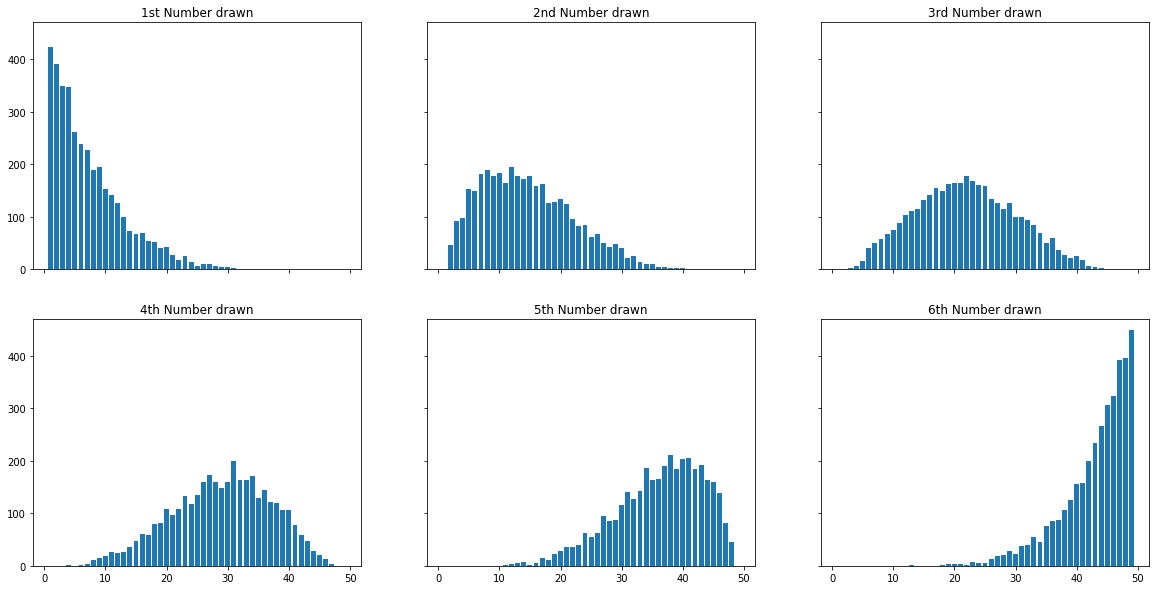

In [88]:
fig, ax = plt.subplots(figsize=(20,10), nrows=2,ncols=3, sharex=True, sharey=True)
ax[0][0].bar(number1.index, number1.values)
ax[0][0].set_title("1st Number drawn")
ax[0][1].bar(number2.index, number2.values)
ax[0][1].set_title("2nd Number drawn")
ax[0][2].bar(number3.index, number3.values)
ax[0][2].set_title("3rd Number drawn")
ax[1][0].bar(number4.index, number4.values)
ax[1][0].set_title("4th Number drawn")
ax[1][1].bar(number5.index, number5.values)
ax[1][1].set_title("5th Number drawn")
ax[1][2].bar(number6.index, number6.values)
ax[1][2].set_title("6th Number drawn")
plt.show()